<a href="https://colab.research.google.com/github/Samarth2711/Play-Store-App-Review-Analysis/blob/main/Capstone_Project_1_Play_Store_App_Review_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market.**
#**Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.**
#**Explore and analyze the data to discover key factors responsible for app engagement and success.**

#**Importing necessary libraries**

In [ ]:
# Importing standard libraries
import numpy as np
import operator
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

#**Mounting Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#**Creating path variable for both the datasets**

In [ ]:
df_ps = pd.read_csv("/content/drive/MyDrive/Capstone Project/Individual NB/Play Store App Review Analysis/Play Store Data.csv")
df_user = pd.read_csv("/content/drive/MyDrive/Capstone Project/Individual NB/Play Store App Review Analysis/User Reviews.csv")

In [ ]:
df_ps.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

##**Viewing data set features, values and struture of Playstore database**

In [ ]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
df_ps.describe()

,Rating
count,9367.000000
mean,4.193338
std,0.537431
min,1.000000
25%,4.000000
50%,4.300000
75%,4.500000
max,19.000000


#**Finding the percentage of null values in each column**

In [ ]:
percent_missing = df_ps.isnull().sum() * 100 / len(df_ps)
missing_value_df = pd.DataFrame({'column_name': df_ps.columns,
                                 'percent_missing': percent_missing})

In [ ]:
  missing_value_df

,column_name,percent_missing
App,App,0.000000
Category,Category,0.000000
Rating,Rating,13.596532
Reviews,Reviews,0.000000
Size,Size,0.000000
Installs,Installs,0.000000
Type,Type,0.009224
Price,Price,0.000000
Content Rating,Content Rating,0.009224
Genres,Genres,0.000000



**Dropping null values**

In [ ]:
df_ps = df_ps[df_ps['Current Ver'].notna()]
df_ps = df_ps[df_ps['Android Ver'].notna()]
df_ps = df_ps[df_ps['Type'].notna()]

In [ ]:
# Finding mean and median in the Rating column excluding the NaN values.

mean_rating = df_ps[~df_ps['Rating'].isnull()]['Rating'].mean()
median_rating = df_ps[~df_ps['Rating'].isnull()]['Rating'].median()

In [ ]:
mean_rating, median_rating

(4.191837606837606, 4.3)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


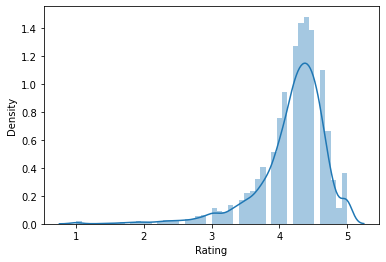

In [ ]:
sns.distplot(df_ps['Rating'])

From the distplot visualizations, it is clear that the ratings are left skewed.

We know that if the variable is skewed, the mean is biased by the values at the far end of the distribution. Therefore, the median is a better representation of the majority of the values in the variable.

Hence we will impute the NaN values in the Rating column with its median.




In [ ]:
# Replacing the NaN values in the 'Rating' colunm with its median value
df_ps['Rating'].fillna(value=median_rating,inplace=True)

**Dropping duplicates from "App" column**


In [ ]:
df_ps = df_ps.drop_duplicates(subset = 'App')

In [ ]:
# Dropping dollar symbol applied to the price column
df_ps['Price'] = df_ps['Price'].apply(lambda x: float(x[1:]) if '$' in x else float(x))
df_ps.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0.0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
#Chaging the datatype of installs to integer by removing commas and "+" symbols

df_ps['Installs'] = df_ps['Installs'].apply(lambda x: int(x[:-1].replace(',',''))  if '+' and ',' in x else (int(x[:-1]) if '+' in x else int(x)))

In [ ]:
  #chagnging the datatype of Last updated to date_time for easy processing
  df_ps["Last Updated"] = pd.to_datetime(df_ps['Last Updated'])

In [ ]:
#Bringing the size column to same units that is "MB"
df_ps['Size'] = df_ps['Size'].apply(lambda x: float(x[:-1]) if 'M' in x else (round(float(x[:-1])/1024, 4) if 'k' in x else x))

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


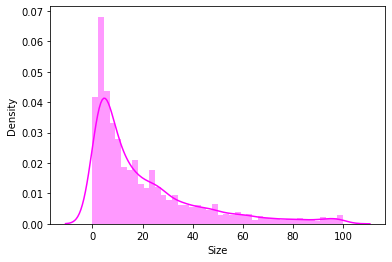

In [ ]:
#Displot

sns.distplot(df_ps[df_ps['Size'] != 'Varies with device']['Size'], color='Magenta')


The data in the Size column is skewed towards the right.

Also, we see that a vast majority of the entries in this column are of the value Varies with device, replacing this with any central tendency value (mean or median) may give incorrect visualizations and results. Hence these values are left as it is.

We have successfully converted all the valid entries in the Size column to a single unit of measure (MB) and the datatype from string to float.

In [ ]:
#converting reviews to type int

df_ps['Reviews'] = df_ps['Reviews'].astype(int)

In [ ]:
df_ps.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up


In [ ]:
percent_missing_user = df_user.isnull().sum() * 100 / len(df_user)
missing_value_df_user = pd.DataFrame({'column_name': df_user.columns,
                                 'percent_missing': percent_missing_user})

In [ ]:
missing_value_df_user

,column_name,percent_missing
App,App,0.000000
Translated_Review,Translated_Review,41.788631
Sentiment,Sentiment,41.780854
Sentiment_Polarity,Sentiment_Polarity,41.780854
Sentiment_Subjectivity,Sentiment_Subjectivity,41.780854


In [ ]:
df_user = df_user.dropna()

In [ ]:
merged_df = pd.merge(df_ps, df_user, on='App', how = "inner")

In [ ]:
percent_missing_merged = merged_df.isnull().sum() * 100 / len(merged_df)
missing_value_df_merged = pd.DataFrame({'column_name': merged_df.columns,
                                 'percent_missing': percent_missing_merged})

In [ ]:
missing_value_df_merged

,column_name,percent_missing
App,App,0.0
Category,Category,0.0
Rating,Rating,0.0
Reviews,Reviews,0.0
Size,Size,0.0
Installs,Installs,0.0
Type,Type,0.0
Price,Price,0.0
Content Rating,Content Rating,0.0
Genres,Genres,0.0





#**1.What are the most popular apps (popularity---> no:of installs+ rating)**

In [ ]:
df_1 = merged_df[['Rating', 'Installs', 'App']]

In [ ]:
df_1.head()

,Rating,Installs,App
0,3.9,500000,Coloring book moana
1,3.9,500000,Coloring book moana
2,3.9,500000,Coloring book moana
3,3.9,500000,Coloring book moana
4,3.9,500000,Coloring book moana


In [ ]:
df_r = df_1.sort_values(['Rating'],
              ascending = [False])

In [ ]:
df_i = df_1.sort_values(['Installs'],
              ascending = [False])

In [ ]:
df_comb = pd.merge(df_r, df_i, on='App', how = "inner")

In [ ]:
df_comb = df_comb.drop_duplicates(subset = 'App')

In [ ]:
df_comb.head(20)

,Rating_x,Installs_x,App,Rating_y,Installs_y
0,4.9,500000,Down Dog: Great Yoga Anywhere,4.9,500000
1600,4.9,100000,CDL Practice Test 2018 Edition,4.9,100000
2176,4.9,100000,DMV Permit Practice Test 2018 Edition,4.9,100000
3332,4.8,10000000,30 Day Fitness Challenge - Workout at Home,4.8,10000000
4293,4.8,1000000,GoodRx Drug Prices and Coupons,4.8,1000000
5662,4.8,1000000,Home Workout for Men - Bodybuilding,4.8,1000000
6338,4.8,10000000,Home Workout - No Equipment,4.8,10000000
7014,4.8,100000,Fuzzy Seasons: Animal Forest,4.8,100000
7210,4.8,1000000,Calculator with Percent (Free),4.8,1000000
7214,4.8,1000000,GPS Speedometer and Odometer,4.8,1000000


In [ ]:
df_comb = df_comb[['App','Rating_x', 'Installs_x']]

**What arte the most popular apps (popularity---> no:of installs+ rating)**

**Top 20 most popular apps based on Rating and number of installs**

In [ ]:
from matplotlib import pyplot

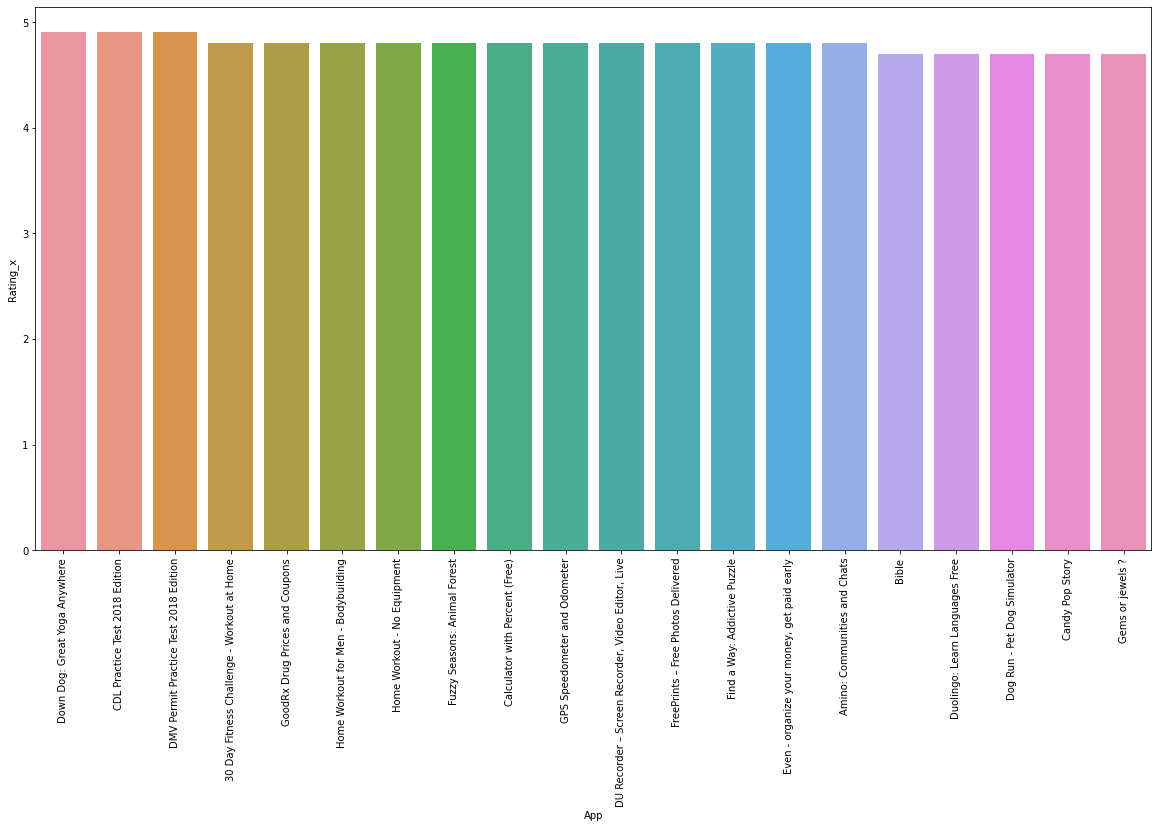

In [ ]:
fig = plt.figure(figsize=(20, 10));
sns.barplot(data = df_comb, x = df_comb['App'][:20], y = df_comb['Rating_x'][:20]);
plt.xticks(rotation = 90);

We can see that all of the top 20 apps are rated close to 5 stars.
We can say the popularity of an app can be determined by higher ratings.

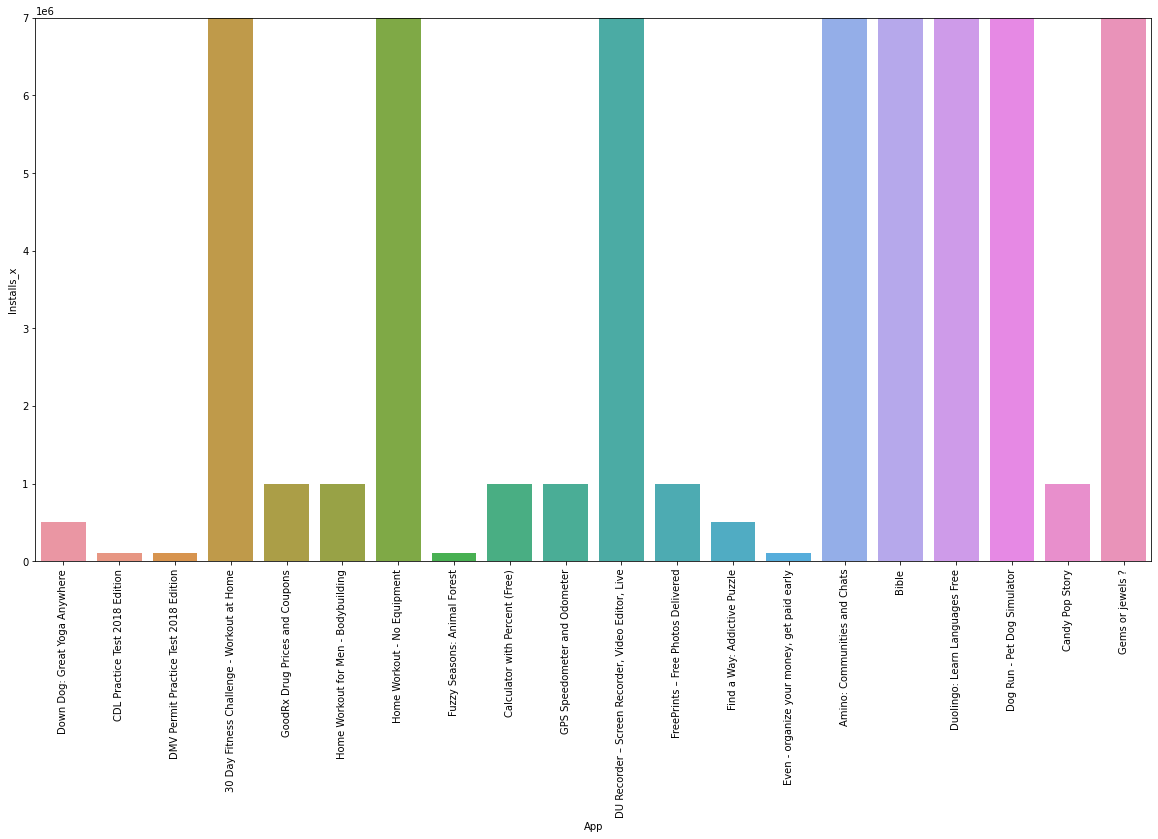

In [ ]:
fig = plt.figure(figsize=(20, 10));
sns.barplot(data = df_comb, x = df_comb['App'][:20], y = df_comb['Installs_x'][:20]);
plt.ylim(0,7000000)
plt.xticks(rotation = 90);

#**Top 20 least popular apps based on Rating and number of installs**

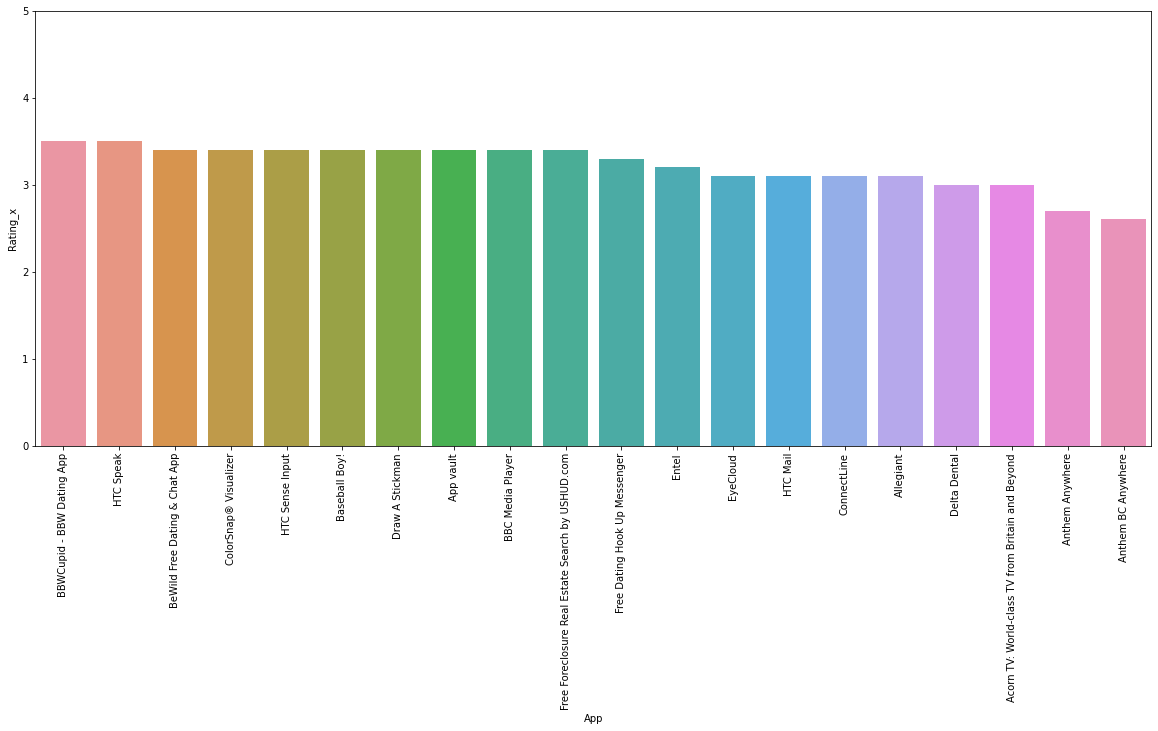

In [ ]:
fig = plt.figure(figsize=(20, 8));
sns.barplot(data = df_comb, x = df_comb['App'][-20:], y = df_comb['Rating_x'][-20:]);
plt.ylim(0,5)
plt.xticks(rotation = 90);

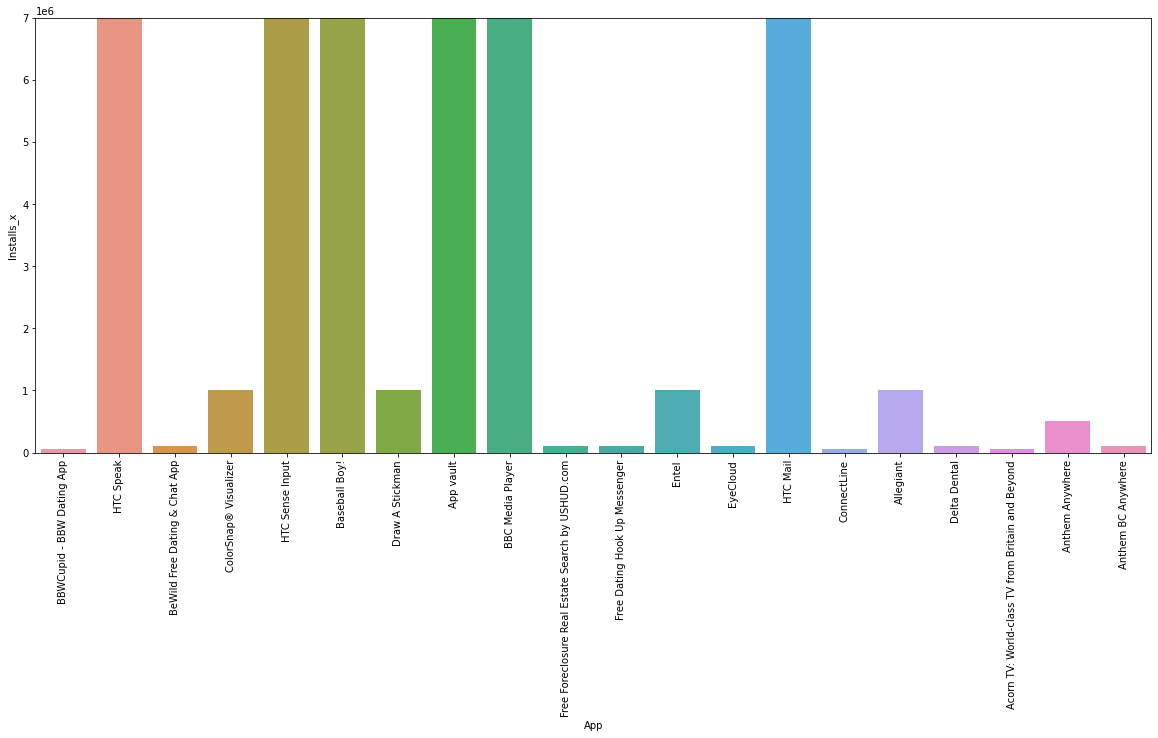

In [ ]:
fig = plt.figure(figsize=(20, 8));
sns.barplot(data = df_comb, x = df_comb['App'][-20:], y = df_comb['Installs_x'][-20:]);
plt.ylim(0,7000000)
plt.xticks(rotation = 90);

#**Which category apps are most installed?**

Text(0.5, 1.0, 'Total app installs in each category')

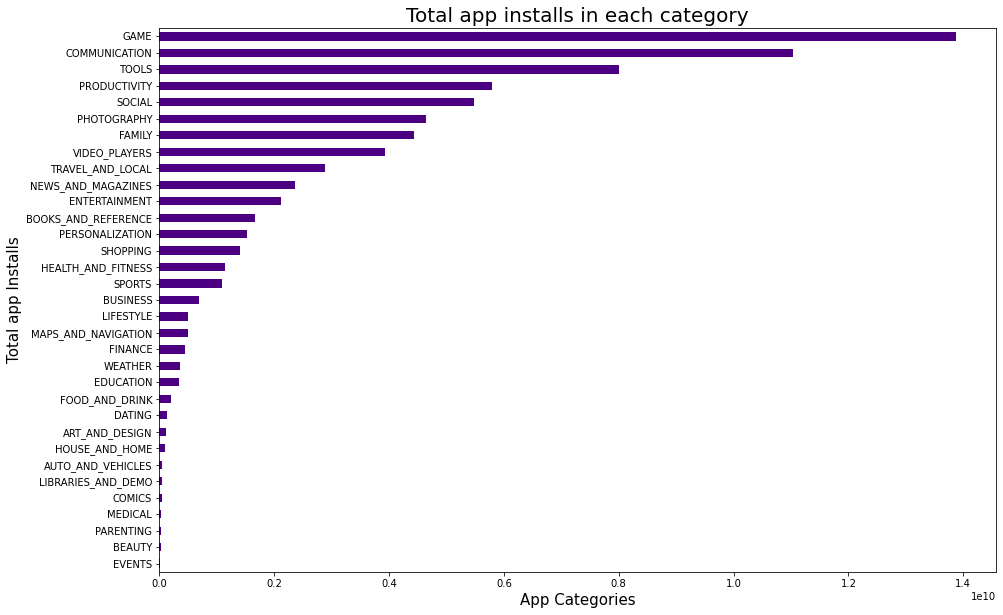

In [ ]:
# Total app installs in each category of the play store

a = df_ps.groupby(['Category'])['Installs'].sum().sort_values()
a.plot.barh(figsize=(15,10), color = 'indigo', )
plt.ylabel('Total app Installs', fontsize = 15)
plt.xlabel('App Categories', fontsize = 15)
plt.xticks()
plt.title('Total app installs in each category', fontsize = 20)

#**Percentage of Free vs Paid apps**

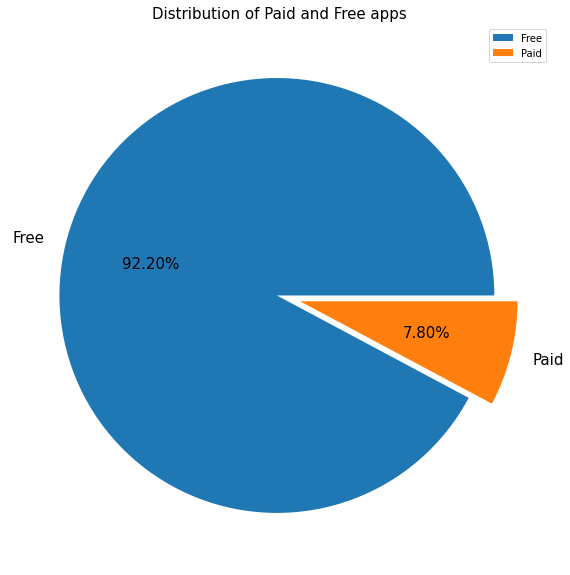

In [ ]:
data = df_ps['Type'].value_counts() 
labels = ['Free', 'Paid']

# create pie chart
plt.figure(figsize=(10,10))
explode=(0.01,0.1)
plt.pie(data, labels = labels, autopct='%.2f%%',explode=explode,textprops={'fontsize': 15})
plt.title('Distribution of Paid and Free apps',size=15,loc='center')
plt.legend()

From the above figure we can easily figure out that **92.20%** of apps present on Play Store are free and **7.80%** apps are of paid category.

#**Top Categories on Play Store**

In [ ]:
df_ps.groupby("Category")["App"].count().sort_values(ascending= False)

Category
FAMILY                 1828
GAME                    959
TOOLS                   825
BUSINESS                420
MEDICAL                 395
PERSONALIZATION         374
PRODUCTIVITY            374
LIFESTYLE               369
FINANCE                 345
SPORTS                  325
COMMUNICATION           315
HEALTH_AND_FITNESS      288
PHOTOGRAPHY             281
NEWS_AND_MAGAZINES      254
SOCIAL                  239
BOOKS_AND_REFERENCE     221
TRAVEL_AND_LOCAL        219
SHOPPING                202
DATING                  171
VIDEO_PLAYERS           163
MAPS_AND_NAVIGATION     131
EDUCATION               119
FOOD_AND_DRINK          112
ENTERTAINMENT           102
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       83
WEATHER                  79
HOUSE_AND_HOME           74
EVENTS                   64
ART_AND_DESIGN           63
PARENTING                60
COMICS                   56
BEAUTY                   53
Name: App, dtype: int64

In [ ]:
x = df_ps['Category'].value_counts()
y = df_ps['Category'].value_counts().index
x_list = []
y_list = []
for i in range(len(x)):
    x_list.append(x[i])
    y_list.append(y[i])

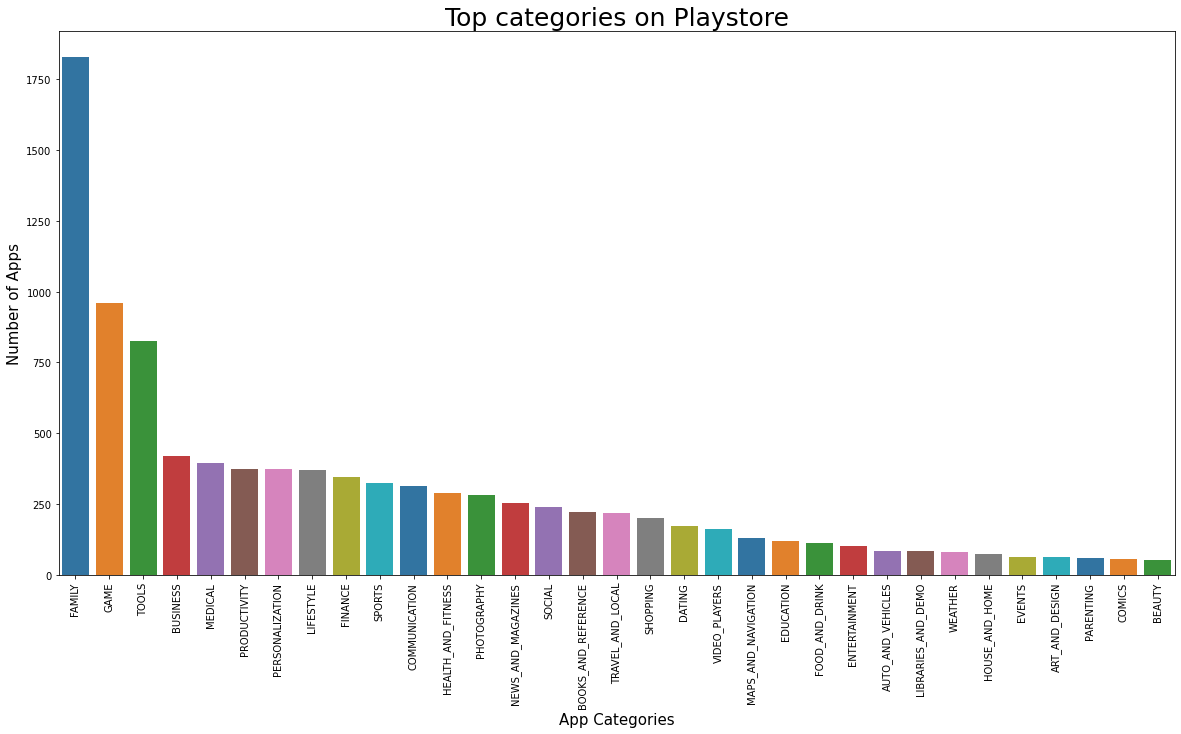

In [ ]:
#Number of apps belonging to each category in the playstore
plt.figure(figsize=(20,10))
plt.xlabel('App Categories', size=15)
plt.ylabel('Number of Apps', size=15)
graph = sns.barplot(y = x_list, x = y_list, palette= "tab10")
graph.set_title("Top categories on Playstore", fontsize = 25)
graph.set_xticklabels(graph.get_xticklabels(), rotation= 90,);

Total categories are 33 in the dataset From the above output we can see that most of the apps are underFAMILY & GAME category and least are of EVENTS & BEAUTY Category.